In [2]:
library(tidyverse)


# Importer les cleaned data

In [3]:
data_clean <- read.csv(
  "data_cleaned.csv",
  header = TRUE,
  sep = ",",
  quote = "\"", 
  stringsAsFactors = FALSE)



head(data_clean)
attach(data_clean)

,Individual_ID,Predator,Predator_taxon,Predator_lifestage,Type_of_feeding_interaction,Standardised_predator_length,SI_predator_mass,Diet_coverage,Prey,Prey_taxon,⋯,SI_prey_mass,Geographic_location,Latitude,Longitude,Depth,Mean_annual_temp,SD_annual_temp,Mean_PP,SD_PP,Specific_habitat
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<int>,<dbl>,<chr>
1,1,Rhizoprionodon terraenovae,ectotherm vertebrate,adult,predacious/piscivorous,93.990,1539.900,all,teleosts/molluscs/crustaceans,mixed,⋯,14.2740,"""""Apalachicola Bay"","" Florida""""","29""""40'N","85""""10'W",30,24.1,4.2,866,214,Coastal Bay
2,2,Rhizoprionodon terraenovae,ectotherm vertebrate,adult,predacious/piscivorous,95.195,1597.800,all,teleosts/molluscs/crustaceans,mixed,⋯,6.0213,"""""Apalachicola Bay"","" Florida""""","29""""40'N","85""""10'W",30,24.1,4.2,866,214,Coastal Bay
3,3,Rhizoprionodon terraenovae,ectotherm vertebrate,adult,predacious/piscivorous,100.020,1843.600,all,teleosts/molluscs/crustaceans,mixed,⋯,11.8930,"""""Apalachicola Bay"","" Florida""""","29""""nN","85""""10'W",30,24.1,4.2,866,214,Coastal Bay
4,4,Rhizoprionodon terraenovae,ectotherm vertebrate,adult,predacious/piscivorous,34.945,87.631,all,teleosts/molluscs/crustaceans,mixed,⋯,8.1220,"""""Apalachicola Bay"","" Florida""""","29""""40'N","85""""10'W",30,24.1,4.2,866,214,Coastal Bay
5,5,Rhizoprionodon terraenovae,ectotherm vertebrate,adult,predacious/piscivorous,31.330,63.866,all,teleosts/molluscs/crustaceans,mixed,⋯,6.5623,"""""Apalachicola Bay"","" Florida""""","29""""40'N","85""""10'W",30,24.1,4.2,866,214,Coastal Bay
6,6,Rhizoprionodon terraenovae,ectotherm vertebrate,adult,predacious/piscivorous,33.740,79.161,all,teleosts/molluscs/crustaceans,mixed,⋯,5.4065,"""""Apalachicola Bay"","" Florida""""","29""""40'N","85""""10'W",30,24.1,4.2,866,214,Coastal Bay


# Log transform of predator and prey length and mass 
predator and prey length and mass are log transformed and rounded to 1 number after ','
The histogram shows that rounding to 1 digit doesn't change the distribution too much.

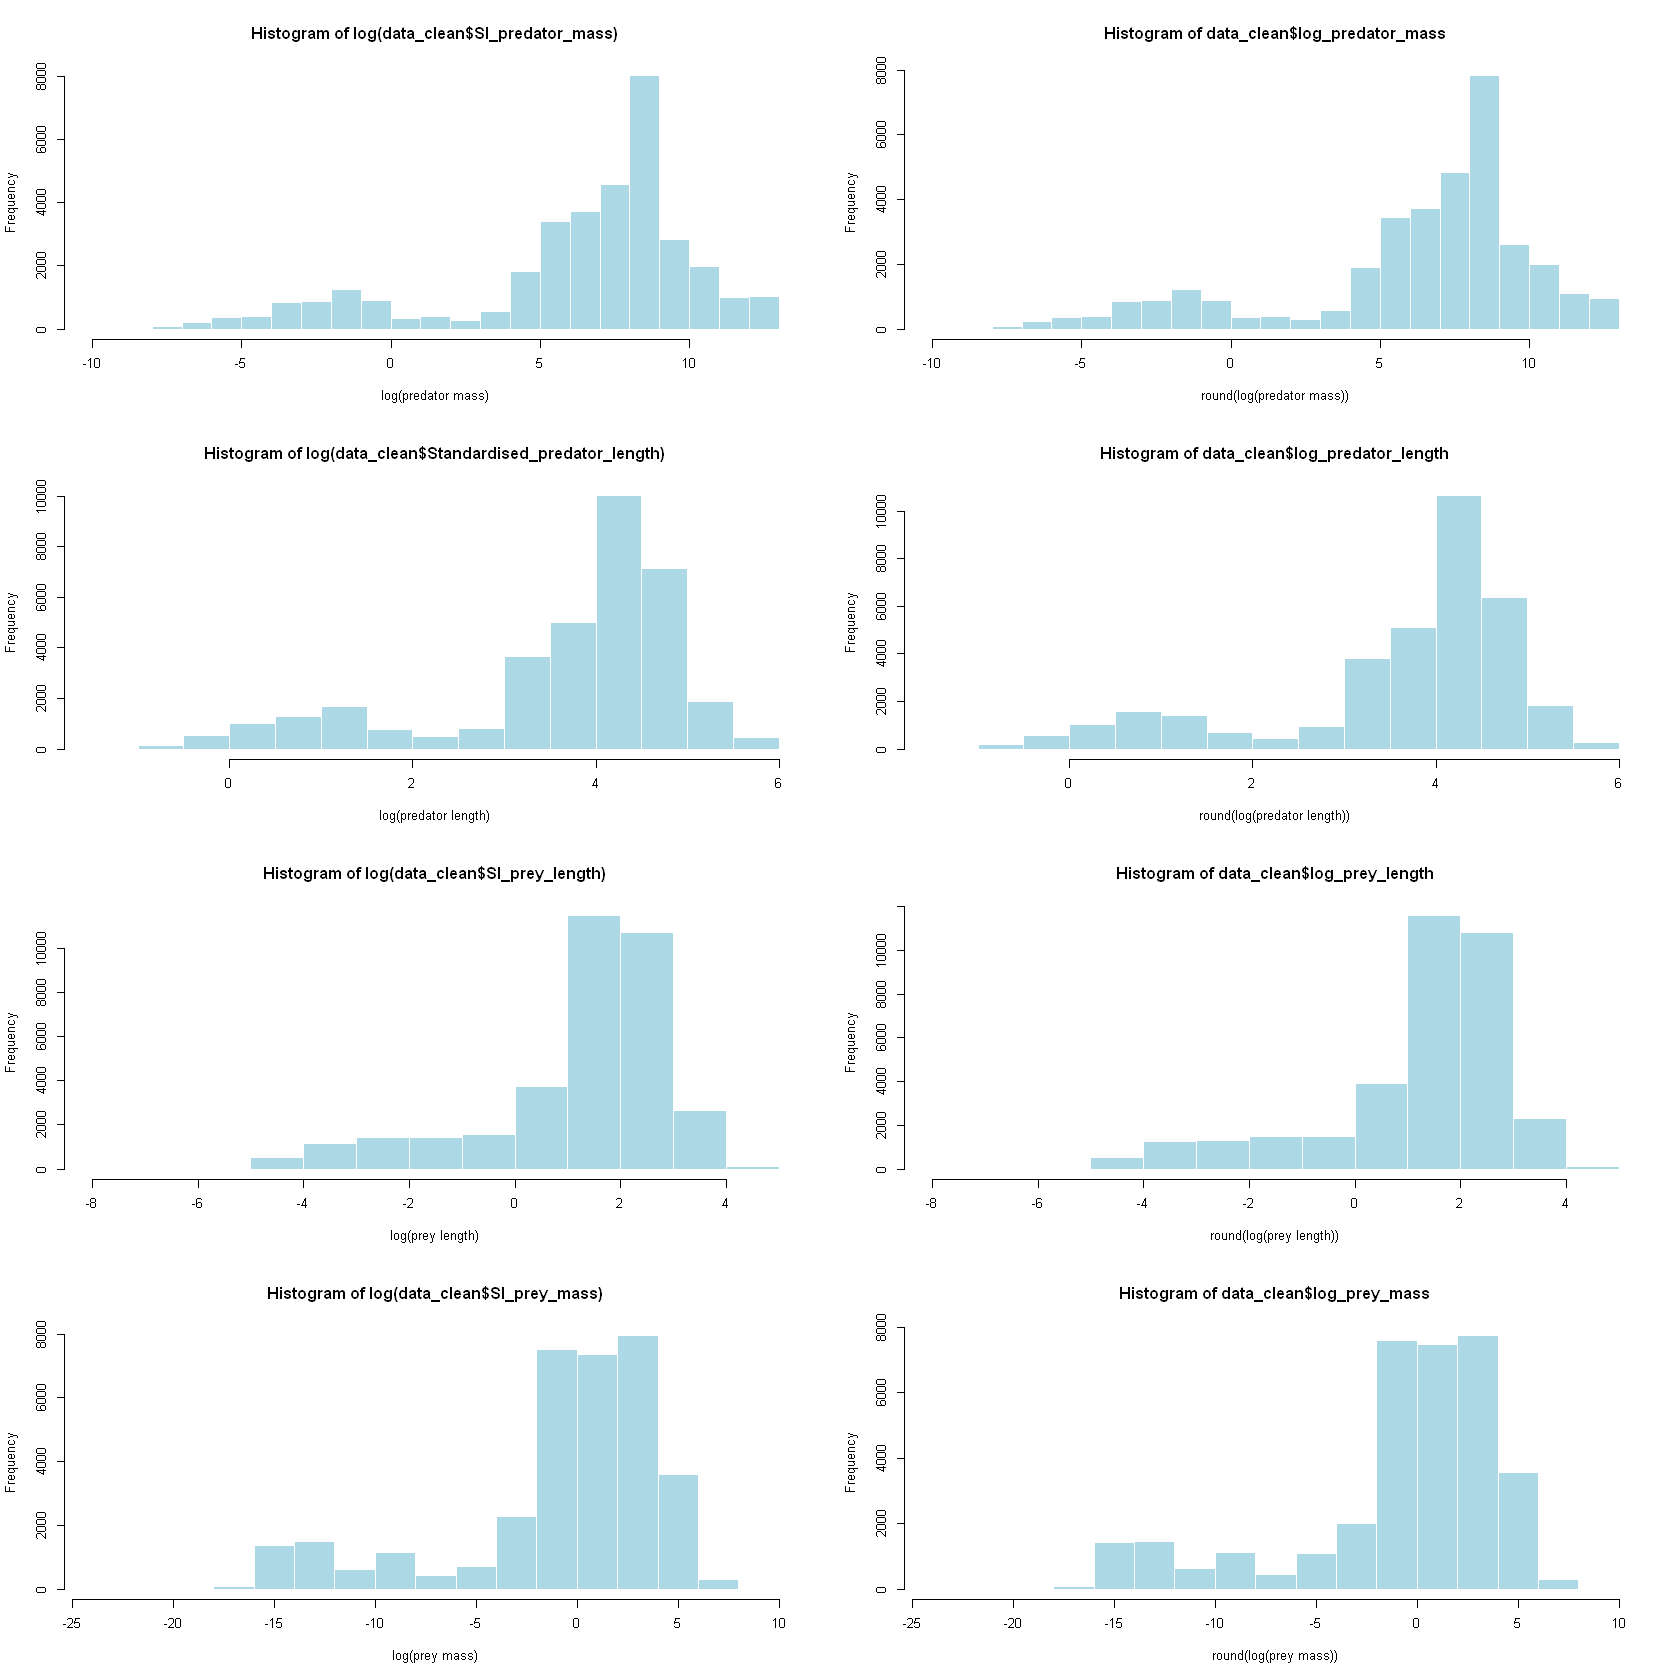

In [4]:
data_clean$log_predator_mass <- round(log(data_clean$SI_predator_mass),digits = 1)
data_clean$log_predator_length <- round(log(data_clean$Standardised_predator_length),digits = 1)
data_clean$log_prey_mass <- round(log(data_clean$SI_prey_mass),digits = 1)
data_clean$log_prey_length <- round(log(data_clean$SI_prey_length),digits = 1)

options(repr.plot.width = 14, repr.plot.height = 14)

par(mfrow = c(4, 2))
#predator mass
hist(log(data_clean$SI_predator_mass), xlab="log(predator mass)",
         col = "lightblue", border="white")
hist(data_clean$log_predator_mass, xlab="round(log(predator mass))",
         col = "lightblue", border="white")

#predator length
hist(log(data_clean$Standardised_predator_length), xlab="log(predator length)",
         col = "lightblue", border="white")    
hist(data_clean$log_predator_length, xlab="round(log(predator length))",
         col = "lightblue", border="white") 

#prey length
hist(log(data_clean$SI_prey_length), xlab="log(prey length)",
         col = "lightblue", border="white")    
hist(data_clean$log_prey_length, xlab="round(log(prey length))",
         col = "lightblue", border="white")    

#prey mass
hist(log(data_clean$SI_prey_mass), xlab="log(prey mass)",
         col = "lightblue", border="white")    
hist(data_clean$log_prey_mass, xlab="round(log(prey mass))",
         col = "lightblue", border="white")    


## Remove non log transformed predator and prey lenght and mass

In [5]:
drop <- c("Standardised_predator_length","SI_predator_mass" ,"SI_prey_length","SI_prey_mass")
data_standardized = data_clean[,!(names(data_clean) %in% drop)]

# Remove duplicate rows


In [6]:
library(dplyr)
data_unique <- data_standardized %>% distinct()

print("Number of duplicate rows removed:")
nrow(data_standardized) - nrow(data_unique)

[1] "Number of duplicate rows removed:"


[1] 8724

# Remplacer ID

In [7]:
# Trouver les lignes avec ID manquant
missing_idx <- which(data_unique$Individual_ID == "n/a" | is.na(data_unique$Individual_ID))

# Convertir la colonne en numérique (si elle est encore de type "character")
# Les "n/a" deviendront NA
data_unique$Individual_ID <- suppressWarnings(as.numeric(data_unique$Individual_ID))

# Trouver le plus grand ID existant pour continuer la numérotation
max_id <- max(data_unique$Individual_ID, na.rm = TRUE)

# Créer de nouveaux IDs pour les lignes manquantes
new_ids <- seq(from = max_id + 1, length.out = length(missing_idx))

# Remplacer les valeurs manquantes
data_unique$Individual_ID[missing_idx] <- new_ids


In [8]:
library(data.table)
fwrite(data_unique, "data_cleaned_2.csv")

Warning message:
"package 'data.table' was built under R version 4.4.3"

Attaching package: 'data.table'


The following objects are masked from 'package:lubridate':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from 'package:dplyr':

    between, first, last


The following object is masked from 'package:purrr':

    transpose




In [9]:
data_final <- read.csv(
  "data_cleaned_2.csv",
  header = TRUE,
  sep = ",",
  quote = "\"", 
  stringsAsFactors = FALSE)



head(data_final)

,Individual_ID,Predator,Predator_taxon,Predator_lifestage,Type_of_feeding_interaction,Diet_coverage,Prey,Prey_taxon,Geographic_location,Latitude,⋯,Depth,Mean_annual_temp,SD_annual_temp,Mean_PP,SD_PP,Specific_habitat,log_predator_mass,log_predator_length,log_prey_mass,log_prey_length
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Rhizoprionodon terraenovae,ectotherm vertebrate,adult,predacious/piscivorous,all,teleosts/molluscs/crustaceans,mixed,"""""Apalachicola Bay"","" Florida""""","29""""40'N",⋯,30,24.1,4.2,866,214,Coastal Bay,7.3,4.5,2.7,2.4
2,2,Rhizoprionodon terraenovae,ectotherm vertebrate,adult,predacious/piscivorous,all,teleosts/molluscs/crustaceans,mixed,"""""Apalachicola Bay"","" Florida""""","29""""40'N",⋯,30,24.1,4.2,866,214,Coastal Bay,7.4,4.6,1.8,2.1
3,3,Rhizoprionodon terraenovae,ectotherm vertebrate,adult,predacious/piscivorous,all,teleosts/molluscs/crustaceans,mixed,"""""Apalachicola Bay"","" Florida""""","29""""nN",⋯,30,24.1,4.2,866,214,Coastal Bay,7.5,4.6,2.5,2.4
4,4,Rhizoprionodon terraenovae,ectotherm vertebrate,adult,predacious/piscivorous,all,teleosts/molluscs/crustaceans,mixed,"""""Apalachicola Bay"","" Florida""""","29""""40'N",⋯,30,24.1,4.2,866,214,Coastal Bay,4.5,3.6,2.1,2.2
5,5,Rhizoprionodon terraenovae,ectotherm vertebrate,adult,predacious/piscivorous,all,teleosts/molluscs/crustaceans,mixed,"""""Apalachicola Bay"","" Florida""""","29""""40'N",⋯,30,24.1,4.2,866,214,Coastal Bay,4.2,3.4,1.9,2.2
6,6,Rhizoprionodon terraenovae,ectotherm vertebrate,adult,predacious/piscivorous,all,teleosts/molluscs/crustaceans,mixed,"""""Apalachicola Bay"","" Florida""""","29""""40'N",⋯,30,24.1,4.2,866,214,Coastal Bay,4.4,3.5,1.7,2.1
